In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data Reading

In [2]:
data = pd.read_csv("Datasets/dataset_heart.csv")
data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

# Descriptive statistics

In [4]:
data.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [5]:
mean_max_heart_rate = round(np.mean(data["max heart rate"]))
print("The population mean is ",mean_max_heart_rate)

The population mean is  150


In [6]:
#t_stat compares means of two groups
#p_value measures probability of values between two groups are due to chance
t_stat, p_value = stats.ttest_1samp(data["max heart rate"], mean_max_heart_rate)
print("T-statistic: ", t_stat)
print("P-value: ", p_value)

T-statistic:  -0.2285554744804208
P-value:  0.819388086551406


In [7]:
if p_value < 0.05:
    print("The sample mean is significantly different from the population mean")
else:
    print("There is no significant difference between the sample mean and the population mean")

There is no significant difference between the sample mean and the population mean


In [8]:
x =  data["max heart rate"]
y = data["age"]
correlation_coef = np.corrcoef(x,y)[0,1]
print("Correlation Coefficient: ",correlation_coef)

Correlation Coefficient:  -0.40221544605675813


# Correlation Graph

Text(0, 0.5, 'Age')

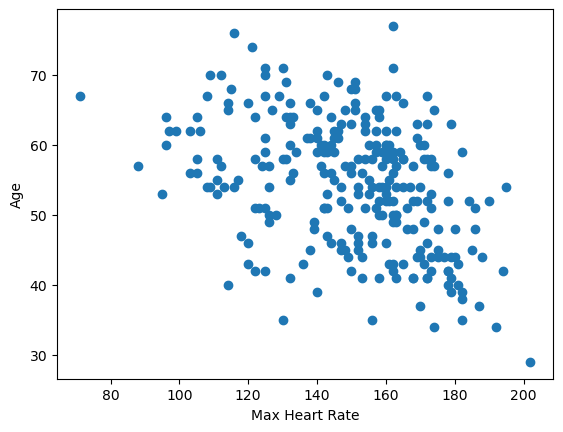

In [9]:
plt.scatter(x,y)
plt.xlabel("Max Heart Rate")
plt.ylabel("Age")

From the above graph we can see that Max Heart Rate co-relates with age

# Heatmap of the entire dataset

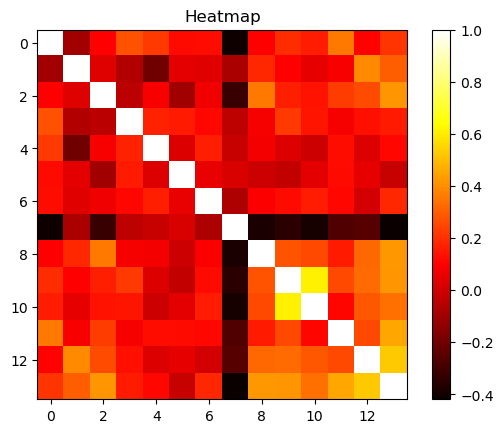

In [10]:
corr_matrix = data.corr()
plt.imshow(corr_matrix,cmap='hot')
plt.colorbar()
plt.title('Heatmap')
plt.show()